# Programming for Data Analytics - Assignment 6 - weather

************************
*Task 05 of the assessment - Knock airport Weather* 
************************

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


*Plot:*

- The temperature
- The mean temperature each day
- The mean temperature for each month


*For additional marks:*
- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds

************

Import nessesary libaries:

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

After inspecting this data, I need to ignore first few rows, to get into my dataset. 

In [208]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Let's check the NaN values. After inspecting this data, the NaN values are False, which may suggest there is no NaN values. However after inspecting the .csv file manually, some data is missing in `wdsp` Windspeed column. For further inspection I am usinf `nan_values = df.isna()` and `df.isnull().sum()` which also show me no missing values. 

In [209]:
# Chcek for missing values

nan_values = df.isna()

print(nan_values)

         date    ind   rain  ind.1   temp  ind.2   wetb  dewpt  vappr   rhum  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
248389  False  False  False  False  False  False  False  False  False  False   
248390  False  False  False  False  False  False  False  False  False  False   
248391  False  False  False  False  False  False  False  False  False  False   
248392  False  False  False  False  False  False  False  False  False  False   
248393  False  False  False  False  False  False  False  False  False  False   

        ...  ind.3   wdsp  ind.4  wddir

In [210]:
# Count missing values

df.isnull().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

Let's check the specific column by using `unique()` function in Pandas. It is used to find all the distinct or unique values in a specific column. After running it, we can quickly understand the variety of values present in data, which in this case is a white space. That is why it did not show as empty earlier. 

In [211]:

# Get unique values in a specific column
unique_wdsp = df['wdsp'].unique()

print(unique_wdsp)

['0' '6' '8' '9' '7' '11' '13' '12' '14' '10' ' ' '4' '5' '3' '2' '15'
 '16' '17' '18' '19' '1' '20' '23' '21' '22' '24' '25' '28' '26' '29' '31'
 '32' '35' '33' '27' '30' '39' '37' '36' '38' '34' '42' '49' '50' '48'
 '43' '40']


Because of that, the entire column won't be showing us as `float` type of data. It will show us as `object` just because of the white spaces. 

In [212]:
# Checking the data type of each column
df.dtypes
print(df.dtypes)

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object


Let's plot the temperature over time now. As the `date` column contains date and time, I will convert this column into `datetime` object. For plotting I need only date, so it will be easier to manipluate with this data. 

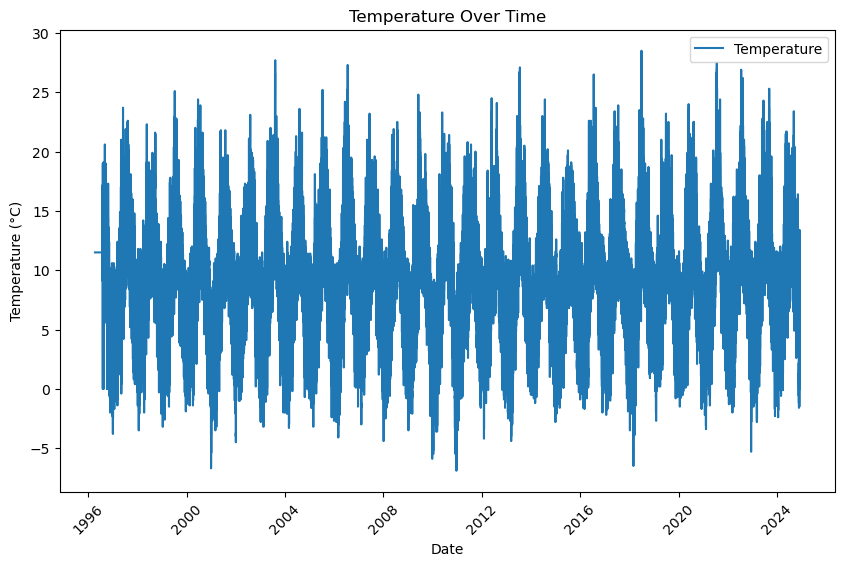

In [213]:
# Converting data to date-time object 
df['datetime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M') # Day of the month as a zero-padded decimal number [01, 02, ..., 30, 31]
                                                                     # Month as locale's abbreviated name
                                                                     # Year with century as a decimal number
                                                                     # Hour (24-hour clock) as a zero-padded decimal number [00, 01, ..., 22, 23]
                                                                     # Minute as a zero-padded decimal number [00, 01, ..., 58, 59]

# Splitting the 'datetime' into 'date' and 'time'
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

# Creating a plot for temperature over time 
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['temp'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('temperature_over_time.png')
plt.show()






Now, to plot mean temperature per day over the time in my dataset. I am using `groupby()` to group data based on specific column values and calculate mean for each day. 

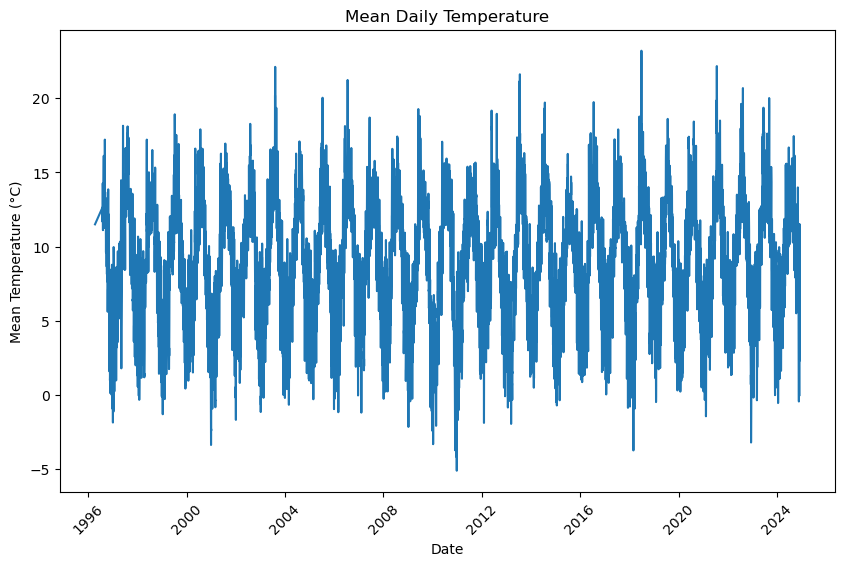

In [214]:
# Calculate daily mean temperature
mean_day = df.groupby('date')['temp'].mean()

# Plot daily mean temperature
plt.figure(figsize=(10, 6))
mean_day.plot()
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Daily Temperature')
plt.xticks(rotation=45)
plt.savefig('mean_daily_temperature.png')
plt.show()

The simiar excercise will plot mean temperature per month over the time in my dataset.  I will use `df['month'] = df['datetime'].dt.to_period('M')` which can convert the datetime column into a period representing only the month and year. 


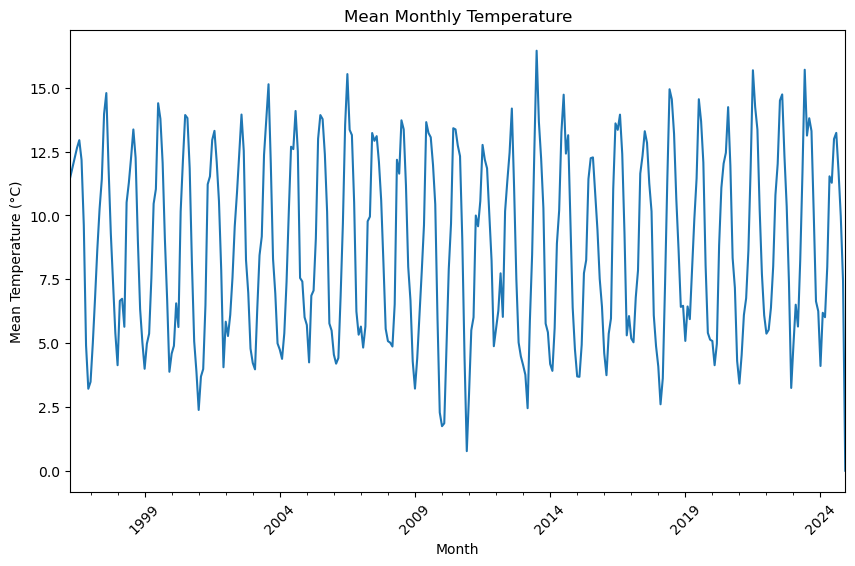

In [215]:
# Calculate monthly mean temperature
df['month'] = df['datetime'].dt.to_period('M')  # to_period('M') converts the datetime to a monthly period
mean_month = df.groupby('month')['temp'].mean()

# Plot monthly mean temperature
plt.figure(figsize=(10, 6))
mean_month.plot()
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Monthly Temperature')
plt.xticks(rotation=45)
plt.savefig('mean_monthly_temperature.png')
plt.show()

***
**Additional plots**
***

In [216]:
# lets see the data again

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


As I already checked earlier, the missing values are in `wdsp` column. To be able to use this data for plotting, I need to clean this data. I will create a new dataset `cleandf`. It will replace white spaces with NaN and then drop them from my dataset. I will also keep only these columns that will be nessesary for plotting. In this case I need dates. Since time and date are in one column, I need to extract dates from it. After that, I will add it to my new data frame. 
In result, my new data set will be cleaned ready to plot. It will contain only `date` and `wdsp` columns. 

In [217]:


# Extracting the month from the 'datetime' column
df['datetime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

# Selecting 'month' and 'wdsp' columns 
df['month'] = df['datetime'].dt.to_period('M')

cleandf = df[['datetime', 'wdsp']].copy()  # Make a copy to avoid warnings

# Replace spaces with NaN and drop rows with NaN in 'wdsp'
cleandf['wdsp'] = cleandf['wdsp'].replace(' ', np.nan)
cleandf.dropna(subset=['wdsp'], inplace=True)

# Convert 'wdsp' to float
cleandf['wdsp'] = cleandf['wdsp'].astype(float)




Let's see it now:

In [218]:
# Checking the data type of each column
cleandf.dtypes
print(cleandf.dtypes)

datetime    datetime64[ns]
wdsp               float64
dtype: object


Now, we are ready for plotting. I want to plot windspeed and 24-hour rolling average in one plot. For 24-hour rolling i use `rolling().mean()`. It refers to a rolling window operation applied to a time series or a sequence of data. `rolling(window=24)` creates a rolling window of size 24 as for 24 hours each day, because in out dataset we have hourly data. This means that for each data point, the function will consider the previous 24 data points (24-hour window). `min_periods=1` means that if there are fewer than 24 data points in the window (such as at the beginning of the series), it will still calculate the mean for whatever data points are available. Since we need to caluclate the average, I use `.mean()`.

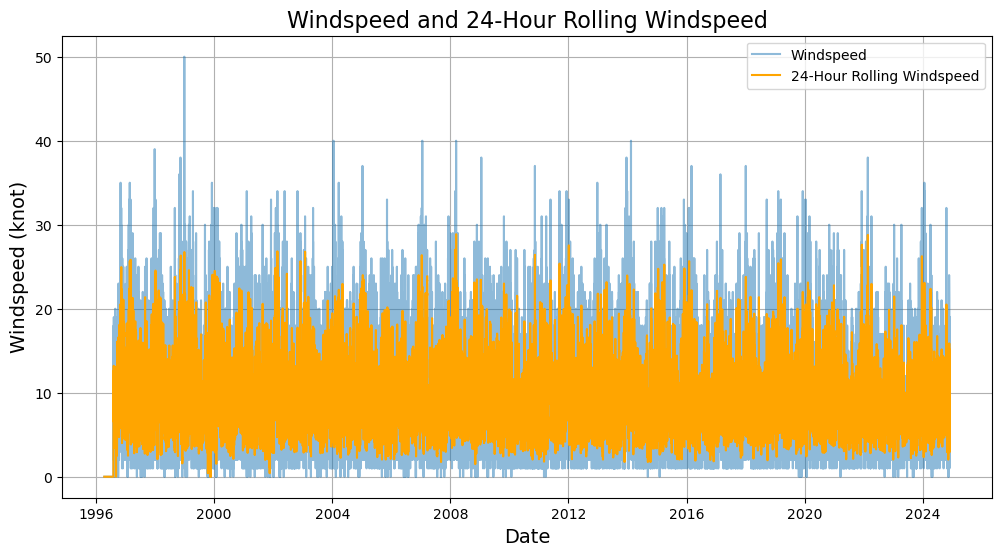

In [219]:

# Calculate the rolling average over 24 hours as we have hourly data
cleandf['rolling_24hr_wdsp'] = cleandf['wdsp'].rolling(window=24, min_periods=1).mean() # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

# Plotting the windspeed and rolling windspeed data
plt.figure(figsize=(12, 6))

# Plot windspeed
plt.plot(cleandf['datetime'], cleandf['wdsp'], label='Windspeed', alpha=0.5)

# Plot rolling 24-hour average windspeed
plt.plot(cleandf['datetime'], cleandf['rolling_24hr_wdsp'], label='24-Hour Rolling Windspeed', color='orange')


plt.title('Windspeed and 24-Hour Rolling Windspeed', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Windspeed (knot)', fontsize=14)
plt.legend()
plt.grid()
plt.savefig('windspeed_rolling_windspeed.png')
plt.show()

The two other plots will show the max speed for each day and the monthly mean of the daily max windspeeds. To do that, I calculate the maximum wind speed for each day by resampling the data to a daily frequency and using `.resample('D').max()`. Then, I calculate the monthly mean of the daily maximum wind speeds by resampling the daily data to monthly frequency and applying `.resample('ME').mean()`. Next, I create a plot where I display the daily maximum wind speeds as blue circles `('o')` and the monthly means as orange triangles ('^')`. This allows me to compare daily fluctuations in wind speed with the overall monthly trends. 

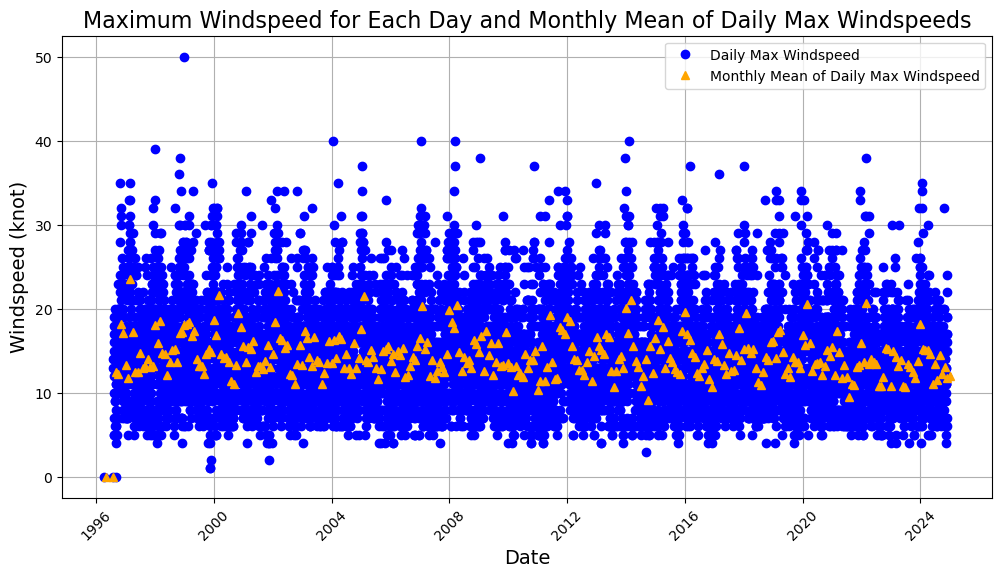

In [220]:
cleandf.set_index('datetime', inplace=True)
# Calculate the maximum wind speed for each day
daily_max_wind = cleandf.resample('D').max()  # Resample to daily frequency and calculate max wind speed https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

# Calculate the monthly mean of the daily maximum wind speeds
monthly_mean_max_wind = daily_max_wind.resample('ME').mean()  # Resample to monthly frequency and calculate the mean

# Plotting both the daily max wind speeds and monthly mean max wind speeds
plt.figure(figsize=(12, 6))

# Plot maximum wind speed for each day with 'o' markers. Use linestyle='None' to plot only markers
plt.plot(daily_max_wind.index, daily_max_wind['wdsp'], label='Daily Max Windspeed', color='blue', marker='o', linestyle='None') #`daily_max_wind.index` is used as the x-axis (dates)
                                                                                                                                #`daily_max_wind['wdsp']` is used as the y-axis (wind speeds).

# Plot the monthly mean of the daily maximum wind speeds with '^' markers. 
plt.plot(monthly_mean_max_wind.index, monthly_mean_max_wind['wdsp'], label='Monthly Mean of Daily Max Windspeed', color='orange', marker='^', linestyle='None') #`monthly_mean_max_wind.index:` The dates for each month (typically the 1st of each month)
                                                                                                                                                                    # `monthly_mean_max_wind['wdsp']:` The monthly average of the daily maximum wind speeds for each month.
plt.title('Maximum Windspeed for Each Day and Monthly Mean of Daily Max Windspeeds', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Windspeed (knot)', fontsize=14)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.savefig('daily_max_monthly_mean_max_windspeed.png')
plt.show()

***
**References**
***

1. https://stackoverflow.com/questions/59349484/why-does-df-isnull-sum-work-the-way-it-does
2. https://stackoverflow.com/questions/32072076/find-the-unique-values-in-a-column-and-then-sort-them
3. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

******
End